# 機器學習
## Iris

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
import pandas as pd
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
# df["target"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)

In [13]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
df["ans"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
# 看各群的圓心值
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

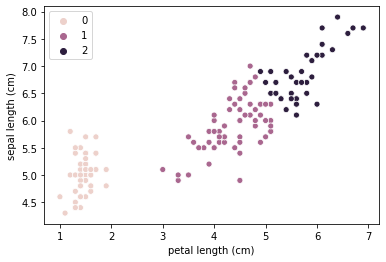

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# Notebook Magic指令：只有在Jupyter Notebook才可以使用
import seaborn as sns
sns.scatterplot(x = df["petal length (cm)"],
                y = df["sepal length (cm)"],
               hue = cluster.labels_)

In [ ]:
# sns.scatterplot 
# sns.displot (連續數字的數量統計) -> 只要設定一個座標，另一個座標會顯示數量 -> 設定kde=True來得到連續的曲線
# sns.countplot (不連續各類型的數量統計) -> 只要設定一個座標，另一個座標會顯示數量

In [22]:
from sklearn.metrics import silhouette_score
x = []
y = []
for k in range(2,10):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"], cluster.labels_)
    x.append(k)
    y.append(s)
print(x)
print(y)


[2, 3, 4, 5, 6, 7, 8, 9]
[0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048, 0.365521885999545, 0.3566882476581684, 0.35974549238457515, 0.3361688008239461]


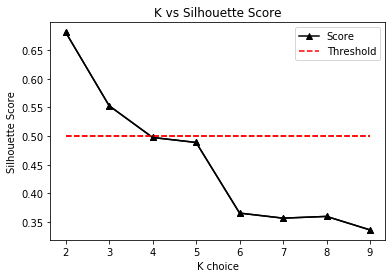

In [35]:
threshold =[0.5]*len(x)
plt.plot(x,y,"^-k")
plt.plot(x,threshold,"--r")
plt.title("K vs Silhouette Score")
plt.xlabel("K choice")
plt.ylabel("Silhouette Score")

p1, = plt.plot(x,y,"^-k", label="Score")
p2, = plt.plot(x,threshold,"--r", label="Threshold")
# p1, -> 逗號表示設定p1為tuple
plt.legend(handles=[p1, p2])
# figure legend, ticks